In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
appearances = pd.read_csv('appearances.csv')
games = pd.read_csv('games.csv')
club_games = pd.read_csv('club_games.csv')
clubs = pd.read_csv('clubs.csv')
game_events = pd.read_csv('game_events.csv')
player_valuations = pd.read_csv('player_valuations.csv')
game_lineups = pd.read_csv('game_lineups.csv')
players = pd.read_csv('players.csv')

In [3]:
games = games[games['competition_id'] == 'GB1']
games['date'] = pd.to_datetime(games['date'])
games = games[(games['date'] >= '2018-08-01') & (games['date'] <= '2024-12-31')]
games = games.drop(['url','competition_type','round','home_club_name','away_club_name','stadium','aggregate','competition_id','season'],axis=1)
games['attendance'] = games['attendance'].fillna(0)
games

,game_id,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,attendance,referee,home_club_formation,away_club_formation
1876,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking
1877,3050215,2018-09-15,1010,985,1,2,4.0,8.0,Javi Gracia,José Mourinho,20537.0,Mike Dean,4-4-2,4-2-3-1
1878,3050250,2018-10-20,631,985,2,2,3.0,10.0,Maurizio Sarri,José Mourinho,40721.0,Mike Dean,4-3-3 Attacking,4-3-3 Attacking
1879,3050264,2018-10-27,180,762,0,0,16.0,19.0,Mark Hughes,Rafael Benítez,30736.0,Chris Kavanagh,4-4-2 double 6,4-4-2 double 6
1880,3050336,2018-12-15,543,989,2,0,7.0,11.0,Nuno Espírito Santo,Eddie Howe,30997.0,Simon Hooper,3-5-2,3-4-2-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66901,3050278,2018-11-10,603,1237,2,1,18.0,12.0,Neil Warnock,Chris Hughton,29402.0,Martin Atkinson,4-3-3 Attacking,4-2-3-1
66913,3421741,2020-11-01,148,1237,2,1,3.0,16.0,José Mourinho,Graham Potter,0.0,Graham Scott,4-2-3-1,3-5-2 flat
66914,3429714,2021-02-06,1132,1237,1,1,17.0,15.0,Sean Dyche,Graham Potter,0.0,Anthony Taylor,4-4-2 double 6,5-3-2
67152,3429694,2021-01-31,1237,148,1,0,17.0,5.0,Graham Potter,José Mourinho,0.0,Peter Bankes,3-4-2-1,3-4-2-1


In [4]:
game_lineups = game_lineups.drop(['game_lineups_id','player_name','number','date'],axis=1)
game_lineups

,game_id,player_id,club_id,type,position,team_captain
0,2317258,1443,610,substitutes,Defensive Midfield,0
1,2317258,5017,610,starting_lineup,Centre-Back,0
2,2317258,9602,1090,substitutes,Left Winger,0
3,2317258,12282,610,starting_lineup,Left-Back,0
4,2317258,25427,1090,starting_lineup,Right Winger,0
...,...,...,...,...,...,...
2145217,4080529,543771,46,substitutes,Defensive Midfield,0
2145218,4080529,602124,430,substitutes,Central Midfield,0
2145219,4080529,780136,46,substitutes,Defensive Midfield,0
2145220,4080529,969192,46,substitutes,Attacking Midfield,0


In [5]:
appearances = appearances[appearances['competition_id'] == 'GB1']
appearances = appearances.drop(['competition_id','player_current_club_id'],axis=1)
appearances['date'] = pd.to_datetime(appearances['date'])
appearances = appearances[(appearances['date'] >= '2018-08-01') & (appearances['date'] <= '2024-12-31')]
appearances

,appearance_id,game_id,player_id,player_club_id,date,player_name,yellow_cards,red_cards,goals,assists,minutes_played
785591,3050172_10003,3050172,10003,1003,2018-08-10,Wes Morgan,0,0,0,0,90
785592,3050172_118287,3050172,118287,1003,2018-08-10,Rachid Ghezzal,0,0,0,0,27
785593,3050172_122153,3050172,122153,985,2018-08-10,Paul Pogba,0,0,1,0,84
785594,3050172_16911,3050172,16911,1003,2018-08-10,Kasper Schmeichel,0,0,0,0,90
785595,3050172_177907,3050172,177907,1003,2018-08-10,Harry Maguire,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...
1555966,4095368_468002,4095368,468002,379,2024-03-17,Ben Johnson,0,0,0,0,24
1555967,4095368_503743,4095368,503743,405,2024-03-17,Morgan Rogers,0,0,0,0,63
1555968,4095368_543499,4095368,543499,379,2024-03-17,Mohammed Kudus,1,0,0,0,90
1555969,4095368_649317,4095368,649317,405,2024-03-17,Jhon Durán,0,0,0,0,45


In [6]:
players = players[players['current_club_domestic_competition_id'] == 'GB1']
players = players.drop(['last_season','first_name','last_name','image_url','url','market_value_in_eur','highest_market_value_in_eur','current_club_domestic_competition_id'],axis=1)
players

,player_id,name,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_name
7,132,Tomas Rosicky,11,tomas-rosicky,CSSR,Praha,Czech Republic,1980-10-04,Attacking Midfield,Midfield,both,179.0,NaN,NaN,Arsenal Football Club
20,488,Gerhard Tremmel,2288,gerhard-tremmel,Germany,München,Germany,1978-11-16,Goalkeeper,Goalkeeper,NaN,NaN,NaN,NaN,Swansea City
63,1397,Michael Owen,512,michael-owen,England,Chester,England,1979-12-14,Centre-Forward,Attack,both,173.0,NaN,NaN,Stoke City
75,1573,Thomas Hitzlsperger,29,thomas-hitzlsperger,Germany,München,Germany,1982-04-05,Central Midfield,Midfield,NaN,NaN,NaN,NaN,Everton Football Club
113,2514,Bastian Schweinsteiger,985,bastian-schweinsteiger,Germany,Kolbermoor,Germany,1984-08-01,Central Midfield,Midfield,NaN,NaN,NaN,BS Family Office,Manchester United Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,1005649,Murillo,703,murillo,Brazil,São Paulo,Brazil,2002-07-04,Centre-Back,Defender,left,184.0,2028-06-30 00:00:00,NaN,Nottingham Forest Football Club
30232,1031256,Callum McFarlane,931,callum-mcfarlane,NaN,NaN,England,2003-09-08,Centre-Forward,Attack,NaN,185.0,NaN,Midas Sports,Fulham Football Club
30315,1060740,Enso González,543,enso-gonzalez,Paraguay,Asunción,Paraguay,2005-01-20,Left Winger,Attack,left,169.0,2029-06-30 00:00:00,NaN,Wolverhampton Wanderers Football Club
30371,1082850,Deivid Washington,631,deivid-washington,Brazil,Itumbiara,Brazil,2005-06-05,Centre-Forward,Attack,right,187.0,2030-06-30 00:00:00,Bertolucci Sports,Chelsea Football Club


In [7]:
player_valuations = player_valuations[player_valuations['player_club_domestic_competition_id'] == 'GB1']
player_valuations = player_valuations[(player_valuations['date'] >= '2018-08-01') & (player_valuations['date'] <= '2024-12-31')]
player_valuations

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
245507,486477,2018-08-01,350000,1010,GB1
245531,346499,2018-08-02,175000,1123,GB1
245563,309180,2018-08-03,750000,1237,GB1
245569,345961,2018-08-03,250000,379,GB1
245944,404842,2018-08-06,500000,29,GB1
...,...,...,...,...,...
465702,867688,2024-03-14,16000000,1237,GB1
465703,922769,2024-03-14,22000000,762,GB1
465704,983989,2024-03-14,18000000,1237,GB1
465705,1005649,2024-03-14,25000000,703,GB1


In [8]:
player_valuations = player_valuations.rename(columns={'date' : 'valuations_date'})
player_valuations

,player_id,valuations_date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
245507,486477,2018-08-01,350000,1010,GB1
245531,346499,2018-08-02,175000,1123,GB1
245563,309180,2018-08-03,750000,1237,GB1
245569,345961,2018-08-03,250000,379,GB1
245944,404842,2018-08-06,500000,29,GB1
...,...,...,...,...,...
465702,867688,2024-03-14,16000000,1237,GB1
465703,922769,2024-03-14,22000000,762,GB1
465704,983989,2024-03-14,18000000,1237,GB1
465705,1005649,2024-03-14,25000000,703,GB1


# 시각화

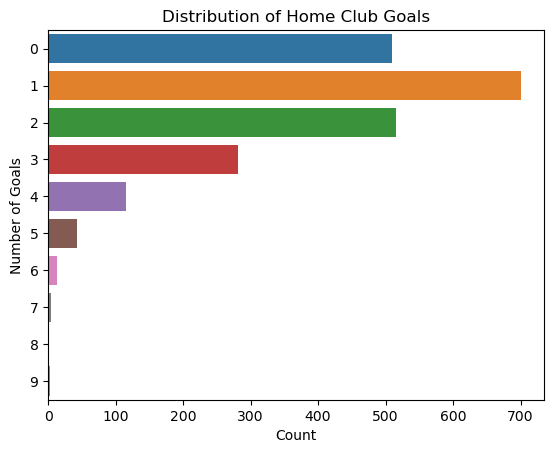

In [9]:
sns.countplot(y='home_club_goals', data=games)

plt.title('Distribution of Home Club Goals')

plt.xlabel('Count')

# y축 레이블 설정 (데이터의 개수이므로 count로 고정)
plt.ylabel('Number of Goals')

# 그래프 출력
plt.show()

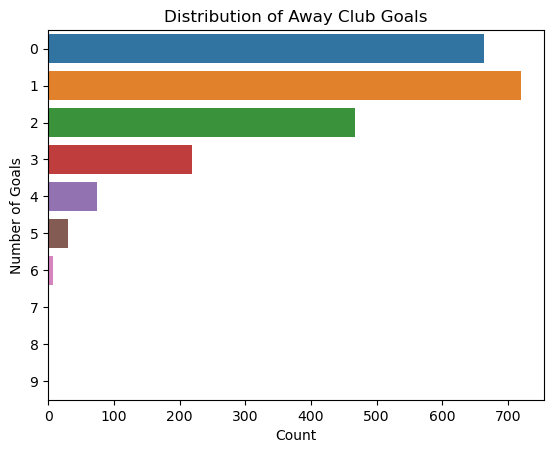

In [10]:
sns.countplot(y='away_club_goals', data=games)

plt.title('Distribution of Away Club Goals')

plt.xlabel('Count')

# y축 레이블 설정 (데이터의 개수이므로 count로 고정)
plt.ylabel('Number of Goals')

# 그래프 출력
plt.show()

In [11]:
home = pd.read_csv('home_club_games.csv')
away = pd.read_csv('away_club_games.csv')

In [12]:
home

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,home_club_name,opponent_name
0,3050170,2018-08-11,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,3-5-2 flat,631,3,2.0,Maurizio Sarri,0,2018,Huddersfield Town,Chelsea Football Club
1,3050215,2018-09-15,1010,1,4.0,Javi Gracia,20537.0,Mike Dean,4-4-2,985,2,8.0,José Mourinho,0,2018,Watford FC,Manchester United Football Club
2,3050250,2018-10-20,631,2,3.0,Maurizio Sarri,40721.0,Mike Dean,4-3-3 Attacking,985,2,10.0,José Mourinho,0,2018,Chelsea Football Club,Manchester United Football Club
3,3050264,2018-10-27,180,0,16.0,Mark Hughes,30736.0,Chris Kavanagh,4-4-2 double 6,762,0,19.0,Rafael Benítez,0,2018,Southampton FC,Newcastle United Football Club
4,3050336,2018-12-15,543,2,7.0,Nuno Espírito Santo,30997.0,Simon Hooper,3-5-2,989,0,11.0,Eddie Howe,1,2018,Wolverhampton Wanderers Football Club,Association Football Club Bournemouth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,3050278,2018-11-10,603,2,18.0,Neil Warnock,29402.0,Martin Atkinson,4-3-3 Attacking,1237,1,12.0,Chris Hughton,1,2018,Cardiff City,Brighton and Hove Albion Football Club
2179,3421741,2020-11-01,148,2,3.0,José Mourinho,0.0,Graham Scott,4-2-3-1,1237,1,16.0,Graham Potter,1,2020,Tottenham Hotspur Football Club,Brighton and Hove Albion Football Club
2180,3429714,2021-02-06,1132,1,17.0,Sean Dyche,0.0,Anthony Taylor,4-4-2 double 6,1237,1,15.0,Graham Potter,0,2020,Burnley Football Club,Brighton and Hove Albion Football Club
2181,3429694,2021-01-31,1237,1,17.0,Graham Potter,0.0,Peter Bankes,3-4-2-1,148,0,5.0,José Mourinho,1,2020,Brighton and Hove Albion Football Club,Tottenham Hotspur Football Club


In [13]:
away

,game_id,date,away_club_id,away_club_goals,away_club_position,away_club_manager_name,attendance,referee,away_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,away_club_name,opponent_name
0,3050170,2018-08-11,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,4-3-3 Attacking,1110,0,19.0,David Wagner,1,2018,Chelsea Football Club,Huddersfield Town
1,3050215,2018-09-15,985,2,8.0,José Mourinho,20537.0,Mike Dean,4-2-3-1,1010,1,4.0,Javi Gracia,1,2018,Manchester United Football Club,Watford FC
2,3050250,2018-10-20,985,2,10.0,José Mourinho,40721.0,Mike Dean,4-3-3 Attacking,631,2,3.0,Maurizio Sarri,0,2018,Manchester United Football Club,Chelsea Football Club
3,3050264,2018-10-27,762,0,19.0,Rafael Benítez,30736.0,Chris Kavanagh,4-4-2 double 6,180,0,16.0,Mark Hughes,0,2018,Newcastle United Football Club,Southampton FC
4,3050336,2018-12-15,989,0,11.0,Eddie Howe,30997.0,Simon Hooper,3-4-2-1,543,2,7.0,Nuno Espírito Santo,0,2018,Association Football Club Bournemouth,Wolverhampton Wanderers Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,3050278,2018-11-10,1237,1,12.0,Chris Hughton,29402.0,Martin Atkinson,4-2-3-1,603,2,18.0,Neil Warnock,0,2018,Brighton and Hove Albion Football Club,Cardiff City
2179,3421741,2020-11-01,1237,1,16.0,Graham Potter,0.0,Graham Scott,3-5-2 flat,148,2,3.0,José Mourinho,0,2020,Brighton and Hove Albion Football Club,Tottenham Hotspur Football Club
2180,3429714,2021-02-06,1237,1,15.0,Graham Potter,0.0,Anthony Taylor,5-3-2,1132,1,17.0,Sean Dyche,0,2020,Brighton and Hove Albion Football Club,Burnley Football Club
2181,3429694,2021-01-31,148,0,5.0,José Mourinho,0.0,Peter Bankes,3-4-2-1,1237,1,17.0,Graham Potter,0,2020,Tottenham Hotspur Football Club,Brighton and Hove Albion Football Club


In [14]:
all_df = pd.concat([home, away], ignore_index=True)
all_df

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,opponent_id,...,is_win,season,home_club_name,opponent_name,away_club_id,away_club_goals,away_club_position,away_club_manager_name,away_club_formation,away_club_name
0,3050170,2018-08-11,1110.0,0.0,19.0,David Wagner,24121.0,Chris Kavanagh,3-5-2 flat,631,...,0,2018,Huddersfield Town,Chelsea Football Club,NaN,NaN,NaN,NaN,NaN,NaN
1,3050215,2018-09-15,1010.0,1.0,4.0,Javi Gracia,20537.0,Mike Dean,4-4-2,985,...,0,2018,Watford FC,Manchester United Football Club,NaN,NaN,NaN,NaN,NaN,NaN
2,3050250,2018-10-20,631.0,2.0,3.0,Maurizio Sarri,40721.0,Mike Dean,4-3-3 Attacking,985,...,0,2018,Chelsea Football Club,Manchester United Football Club,NaN,NaN,NaN,NaN,NaN,NaN
3,3050264,2018-10-27,180.0,0.0,16.0,Mark Hughes,30736.0,Chris Kavanagh,4-4-2 double 6,762,...,0,2018,Southampton FC,Newcastle United Football Club,NaN,NaN,NaN,NaN,NaN,NaN
4,3050336,2018-12-15,543.0,2.0,7.0,Nuno Espírito Santo,30997.0,Simon Hooper,3-5-2,989,...,1,2018,Wolverhampton Wanderers Football Club,Association Football Club Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,3050278,2018-11-10,NaN,NaN,NaN,NaN,29402.0,Martin Atkinson,NaN,603,...,0,2018,NaN,Cardiff City,1237.0,1.0,12.0,Chris Hughton,4-2-3-1,Brighton and Hove Albion Football Club
4362,3421741,2020-11-01,NaN,NaN,NaN,NaN,0.0,Graham Scott,NaN,148,...,0,2020,NaN,Tottenham Hotspur Football Club,1237.0,1.0,16.0,Graham Potter,3-5-2 flat,Brighton and Hove Albion Football Club
4363,3429714,2021-02-06,NaN,NaN,NaN,NaN,0.0,Anthony Taylor,NaN,1132,...,0,2020,NaN,Burnley Football Club,1237.0,1.0,15.0,Graham Potter,5-3-2,Brighton and Hove Albion Football Club
4364,3429694,2021-01-31,NaN,NaN,NaN,NaN,0.0,Peter Bankes,NaN,1237,...,0,2020,NaN,Brighton and Hove Albion Football Club,148.0,0.0,5.0,José Mourinho,3-4-2-1,Tottenham Hotspur Football Club


In [24]:
all_df.columns

Index(['game_id', 'date', 'home_club_id', 'home_club_goals',
       'home_club_position', 'home_club_manager_name', 'attendance', 'referee',
       'home_club_formation', 'opponent_id', 'opponent_goals',
       'opponent_position', 'opponent_manager_name', 'is_win', 'season',
       'home_club_name', 'opponent_name', 'away_club_id', 'away_club_goals',
       'away_club_position', 'away_club_manager_name', 'away_club_formation',
       'away_club_name'],
      dtype='object')

In [25]:
df_win = all_df[all_df['is_win'] == 1].copy()
df_win

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,opponent_id,...,is_win,season,home_club_name,opponent_name,away_club_id,away_club_goals,away_club_position,away_club_manager_name,away_club_formation,away_club_name
4,3050336,2018-12-15,543.0,2.0,7.0,Nuno Espírito Santo,30997.0,Simon Hooper,3-5-2,989,...,1,2018,Wolverhampton Wanderers Football Club,Association Football Club Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN
5,3050353,2018-12-30,985.0,4.0,6.0,Ole Gunnar Solskjær,74556.0,Lee Mason,4-3-1-2,989,...,1,2018,Manchester United Football Club,Association Football Club Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN
6,3050370,2019-01-12,631.0,2.0,4.0,Maurizio Sarri,40491.0,Chris Kavanagh,4-3-3 Attacking,762,...,1,2018,Chelsea Football Club,Newcastle United Football Club,NaN,NaN,NaN,NaN,NaN,NaN
9,3050436,2019-02-22,379.0,3.0,9.0,Manuel Pellegrini,59950.0,Lee Mason,4-1-4-1,931,...,1,2018,West Ham United Football Club,Fulham Football Club,NaN,NaN,NaN,NaN,NaN,NaN
10,3050454,2019-03-03,1010.0,2.0,8.0,Javi Gracia,20062.0,Jonathan Moss,4-4-2 double 6,1003,...,1,2018,Watford FC,Leicester City,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349,3592178,2022-05-10,NaN,NaN,NaN,NaN,41919.0,Jonathan Moss,NaN,405,...,1,2021,NaN,Aston Villa Football Club,31.0,2.0,2.0,Jürgen Klopp,4-3-3 Attacking,Liverpool Football Club
4350,4095319,2024-02-10,NaN,NaN,NaN,NaN,30731.0,Simon Hooper,NaN,543,...,1,2023,NaN,Wolverhampton Wanderers Football Club,1148.0,2.0,14.0,Thomas Frank,Starting Line-up: 3-5-2 flat,Brentford Football Club
4352,4095248,2023-12-23,NaN,NaN,NaN,NaN,23598.0,Rebecca Welch,NaN,931,...,1,2023,NaN,Fulham Football Club,1132.0,2.0,18.0,Vincent Kompany,Starting Line-up: 4-4-2,Burnley Football Club
4354,4095328,2024-02-18,NaN,NaN,NaN,NaN,29522.0,Stuart Attwell,NaN,350,...,1,2023,NaN,Sheffield United Football Club,1237.0,5.0,7.0,Roberto De Zerbi,Starting Line-up: 4-2-3-1,Brighton and Hove Albion Football Club


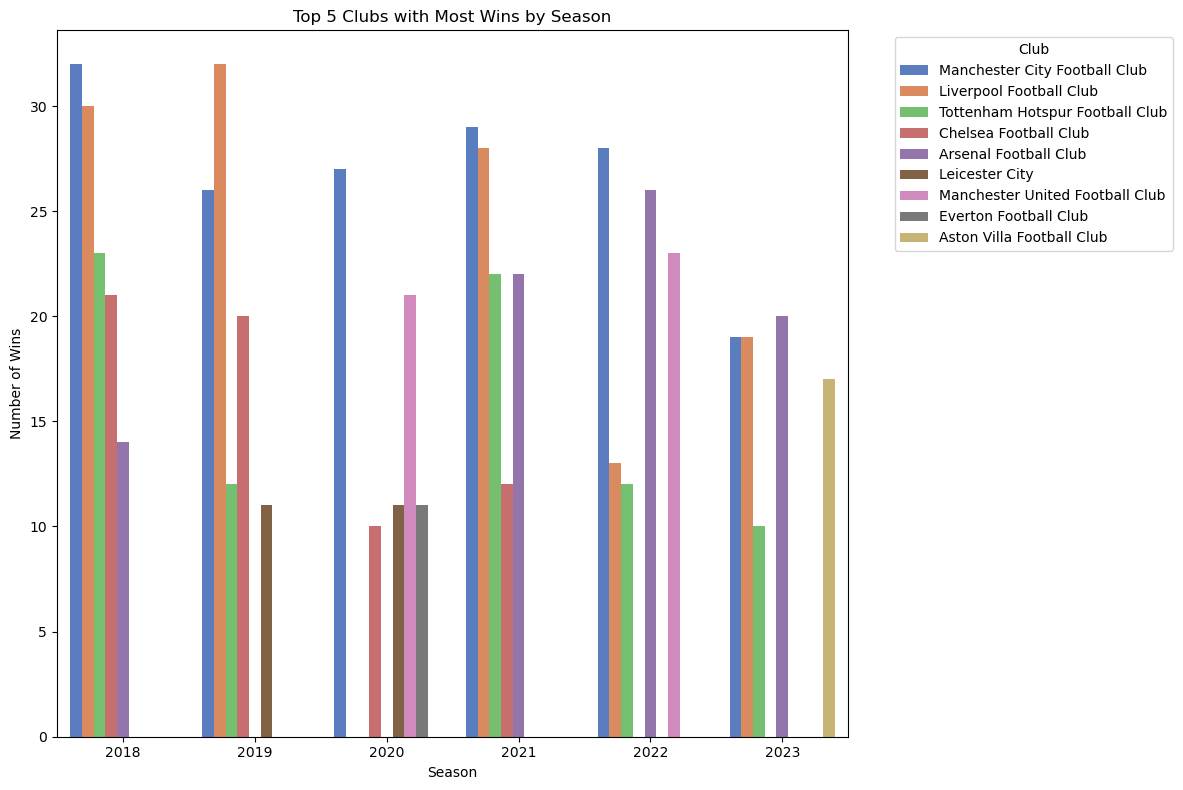

In [27]:
# 각 시즌별 데이터프레임을 담을 리스트 생성
season_dfs = []

# 데이터프레임을 읽어옵니다.
df = all_df

for season in range(2018, 2024):
    # 해당 시즌에서 이긴 데이터만 선택합니다.
    win_data = df[(df['season'] == season) & (df['is_win'] == 1)]
    
    # 상위 5개 클럽을 선택합니다.
    top_5_home_clubs = win_data['home_club_name'].value_counts().head(5)
    top_5_away_clubs = win_data['away_club_name'].value_counts().head(5)
    
    # 홈팀과 어웨이팀에서 이긴 횟수를 합쳐서 상위 5개 클럽을 구합니다.
    top_5_clubs = top_5_home_clubs.add(top_5_away_clubs, fill_value=0).sort_values(ascending=False).head(5)
    
    season_df = pd.DataFrame({'club_name': top_5_clubs.index, 'count': top_5_clubs.values, 'season': season})
    season_dfs.append(season_df)

# 각 시즌별 데이터프레임을 하나로 합칩니다.
top_5_clubs_all_seasons = pd.concat(season_dfs, ignore_index=True)

# 시각화합니다.
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_clubs_all_seasons, x='season', y='count', hue='club_name', palette='muted')
plt.title('Top 5 Clubs with Most Wins by Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


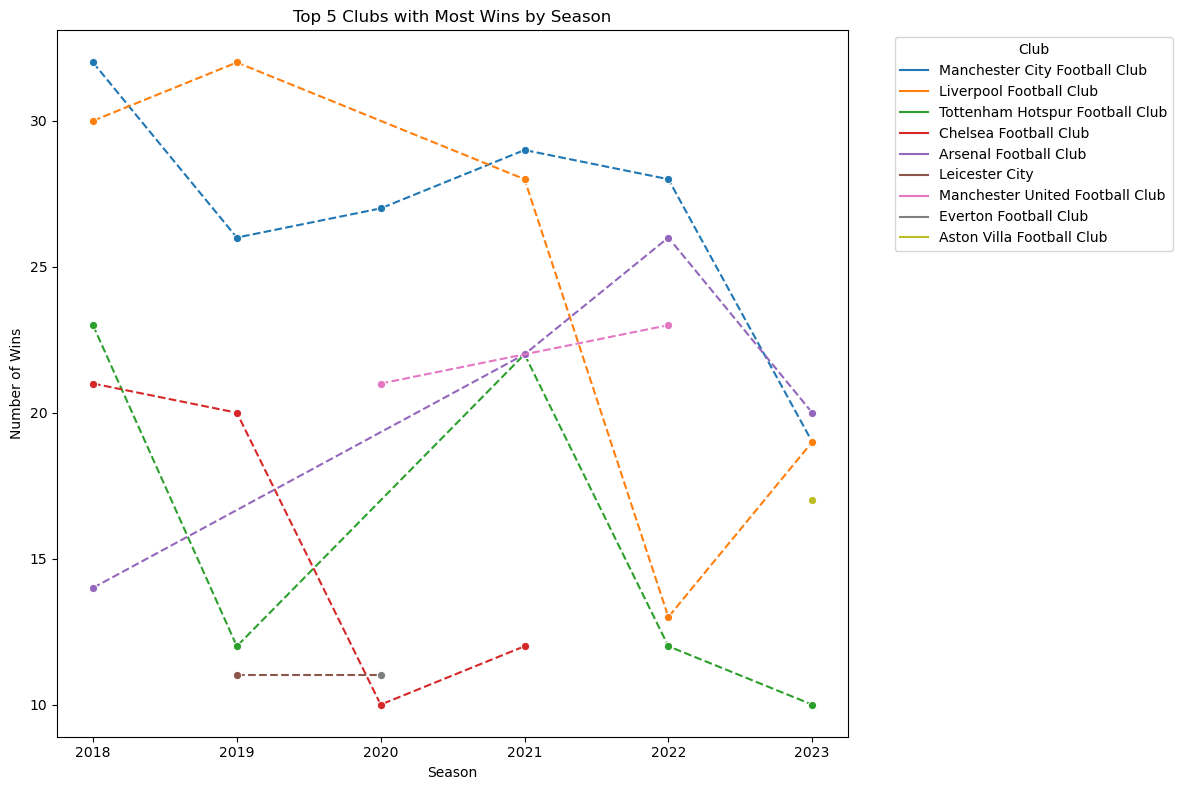

In [28]:
# 각 시즌별 데이터프레임을 하나로 합칩니다.
top_5_clubs_all_seasons = pd.concat(season_dfs, ignore_index=True)

# 점선 그래프로 시각화
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_5_clubs_all_seasons, x='season', y='count', hue='club_name', marker='o', linestyle='dashed')
plt.title('Top 5 Clubs with Most Wins by Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'game_id'}>,
        <Axes: title={'center': 'home_club_id'}>,
        <Axes: title={'center': 'home_club_goals'}>,
        <Axes: title={'center': 'home_club_position'}>],
       [<Axes: title={'center': 'attendance'}>,
        <Axes: title={'center': 'opponent_id'}>,
        <Axes: title={'center': 'opponent_goals'}>,
        <Axes: title={'center': 'opponent_position'}>],
       [<Axes: title={'center': 'is_win'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'away_club_id'}>,
        <Axes: title={'center': 'away_club_goals'}>],
       [<Axes: title={'center': 'away_club_position'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

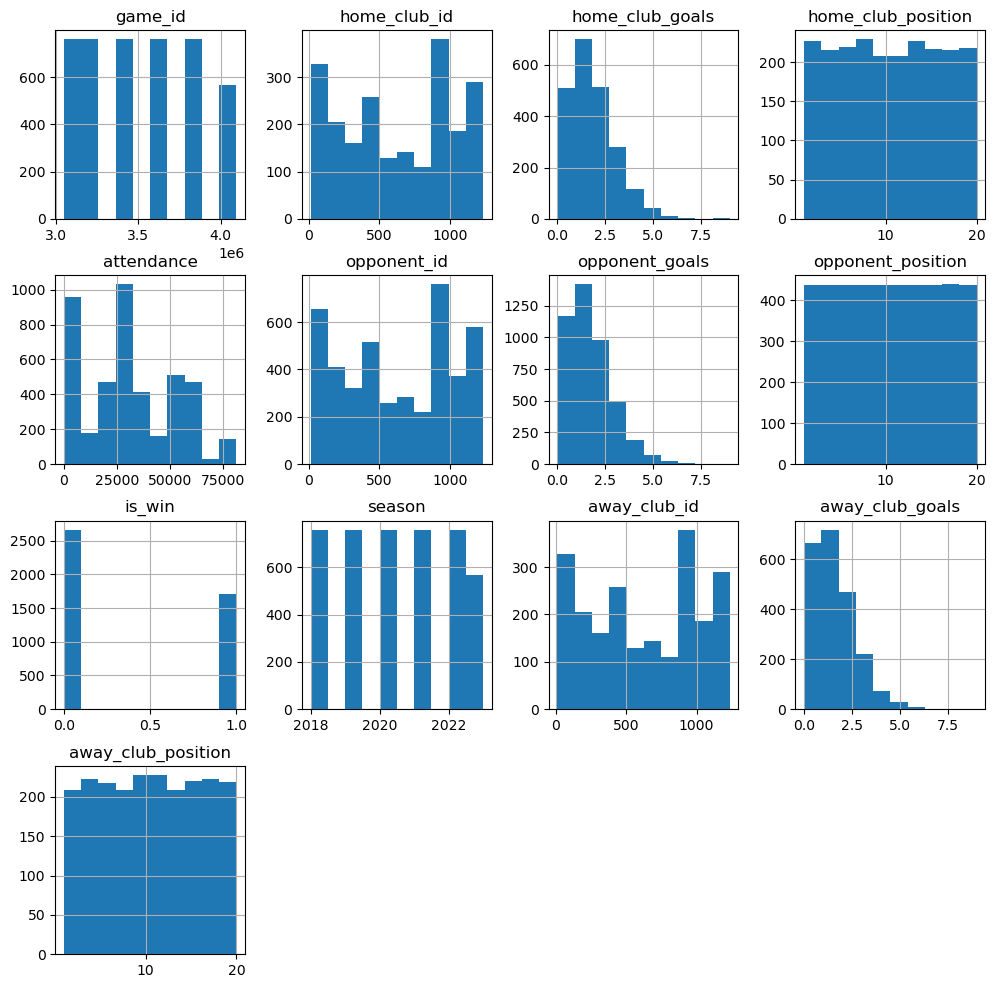

In [29]:
all_df.hist(figsize=(12,12))

In [31]:
players

,player_id,name,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_name
7,132,Tomas Rosicky,11,tomas-rosicky,CSSR,Praha,Czech Republic,1980-10-04,Attacking Midfield,Midfield,both,179.0,NaN,NaN,Arsenal Football Club
20,488,Gerhard Tremmel,2288,gerhard-tremmel,Germany,München,Germany,1978-11-16,Goalkeeper,Goalkeeper,NaN,NaN,NaN,NaN,Swansea City
63,1397,Michael Owen,512,michael-owen,England,Chester,England,1979-12-14,Centre-Forward,Attack,both,173.0,NaN,NaN,Stoke City
75,1573,Thomas Hitzlsperger,29,thomas-hitzlsperger,Germany,München,Germany,1982-04-05,Central Midfield,Midfield,NaN,NaN,NaN,NaN,Everton Football Club
113,2514,Bastian Schweinsteiger,985,bastian-schweinsteiger,Germany,Kolbermoor,Germany,1984-08-01,Central Midfield,Midfield,NaN,NaN,NaN,BS Family Office,Manchester United Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,1005649,Murillo,703,murillo,Brazil,São Paulo,Brazil,2002-07-04,Centre-Back,Defender,left,184.0,2028-06-30 00:00:00,NaN,Nottingham Forest Football Club
30232,1031256,Callum McFarlane,931,callum-mcfarlane,NaN,NaN,England,2003-09-08,Centre-Forward,Attack,NaN,185.0,NaN,Midas Sports,Fulham Football Club
30315,1060740,Enso González,543,enso-gonzalez,Paraguay,Asunción,Paraguay,2005-01-20,Left Winger,Attack,left,169.0,2029-06-30 00:00:00,NaN,Wolverhampton Wanderers Football Club
30371,1082850,Deivid Washington,631,deivid-washington,Brazil,Itumbiara,Brazil,2005-06-05,Centre-Forward,Attack,right,187.0,2030-06-30 00:00:00,Bertolucci Sports,Chelsea Football Club


In [35]:
clubs = clubs[clubs['domestic_competition_id'] == 'GB1']

In [36]:
clubs

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
23,603,cardiff-city,Cardiff City,GB1,NaN,28,25.5,24,85.7,8,Cardiff City Stadium,33280,€-655k,NaN,2018,../data/raw/transfermarkt-scraper/2018/clubs.j...,https://www.transfermarkt.co.uk/cardiff-city/s...
30,989,afc-bournemouth,Association Football Club Bournemouth,GB1,NaN,26,25.8,17,65.4,12,Vitality Stadium,11329,€-125.79m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/afc-bournemout...
42,3008,hull-city,Hull City,GB1,NaN,28,25.0,17,60.7,6,MKM Stadium,25586,+€7.50m,NaN,2016,../data/raw/transfermarkt-scraper/2016/clubs.j...,https://www.transfermarkt.co.uk/hull-city/star...
43,31,fc-liverpool,Liverpool Football Club,GB1,NaN,28,25.6,21,75.0,18,Anfield,54074,€-111.30m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-liverpool/s...
59,1010,fc-watford,Watford FC,GB1,NaN,30,26.3,24,80.0,12,Vicarage Road,21577,+€42.02m,NaN,2021,../data/raw/transfermarkt-scraper/2021/clubs.j...,https://www.transfermarkt.co.uk/fc-watford/sta...
85,1003,leicester-city,Leicester City,GB1,NaN,25,27.1,14,56.0,11,King Power Stadium,32273,+€26.00m,NaN,2022,../data/raw/transfermarkt-scraper/2022/clubs.j...,https://www.transfermarkt.co.uk/leicester-city...
86,1237,brighton-amp-hove-albion,Brighton and Hove Albion Football Club,GB1,NaN,27,25.5,19,70.4,16,AMEX Stadium,31800,+€86.40m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/brighton-amp-h...
135,703,nottingham-forest,Nottingham Forest Football Club,GB1,NaN,28,26.9,24,85.7,16,The City Ground,30445,€-48.23m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/nottingham-for...
138,1031,luton-town,Luton Town Football Club,GB1,NaN,28,27.5,16,57.1,10,Kenilworth Road,11050,€-25.62m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/luton-town/sta...


/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_25348/1737810446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreigners_percentage'] = (df['foreigners_number'] / df['squad_size']) * 100


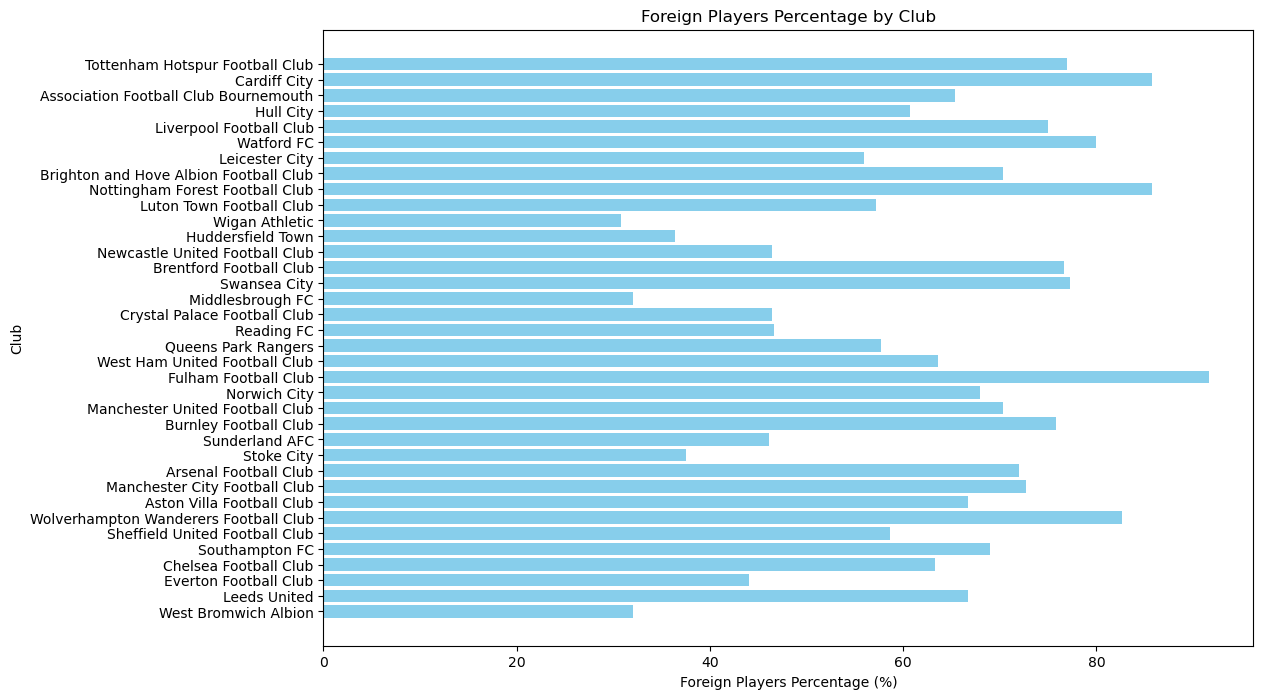

In [37]:
df = clubs
df['foreigners_percentage'] = (df['foreigners_number'] / df['squad_size']) * 100

# 클럽별 외국인 선수 비율 시각화
plt.figure(figsize=(12, 8))
plt.barh(df['name'], df['foreigners_percentage'], color='skyblue')
plt.xlabel('Foreign Players Percentage (%)')
plt.ylabel('Club')
plt.title('Foreign Players Percentage by Club')
plt.gca().invert_yaxis()  # y축을 내림차순으로 정렬
plt.show()